In [1]:
# importar librerías
import pandas as pd

In [2]:
df=pd.read_csv('.\datasets\gapminder.csv') #archivo dentro de una carpeta
#df=pd.read_csv('gapminder.csv') #archivo al mismo nivel del notebook
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


In [3]:
# importar la librería para graficar datos de pandas
import matplotlib.pyplot as plt

In [4]:
# validar los tipos de datos
df.dtypes

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object

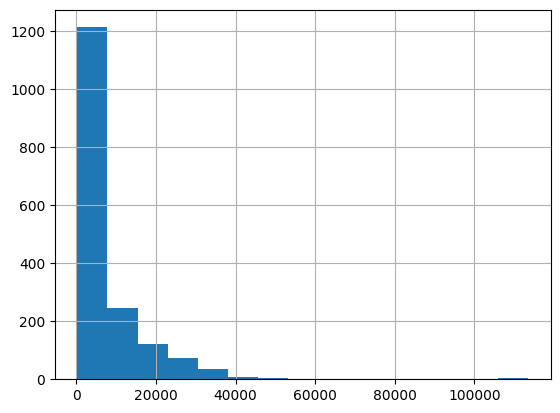

In [5]:
# histograma de una columna del dataframe
# df['gdp_cap'] = pd.to_numeric(df['gdp_cap'], errors='coerce') #convertir a numérico y forzar errores a NaN
df['gdp_cap'].hist(bins=15)
plt.show()

<Axes: xlabel='year'>

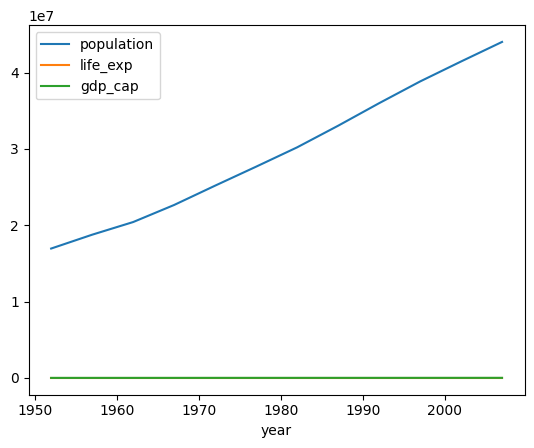

In [6]:
(df.groupby('year')
   .mean(numeric_only=True)
   .plot()
)

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

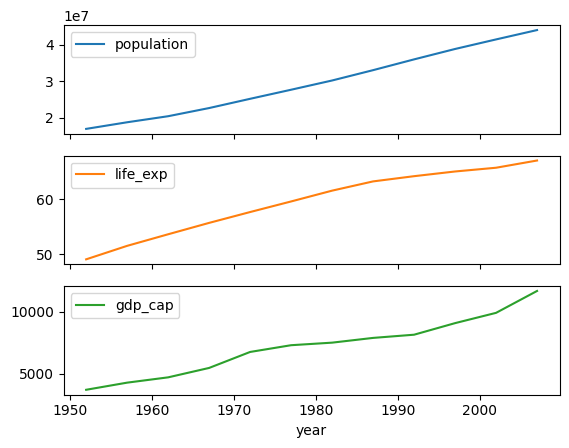

In [7]:
# grafico de lineas de las columnas resultado de la agrupación por años con subplots
(df.groupby('year')
   .mean(numeric_only=True)
   .plot(subplots=True)
)

population       Axes(0.125,0.11;0.227941x0.77)
life_exp      Axes(0.398529,0.11;0.227941x0.77)
gdp_cap       Axes(0.672059,0.11;0.227941x0.77)
dtype: object

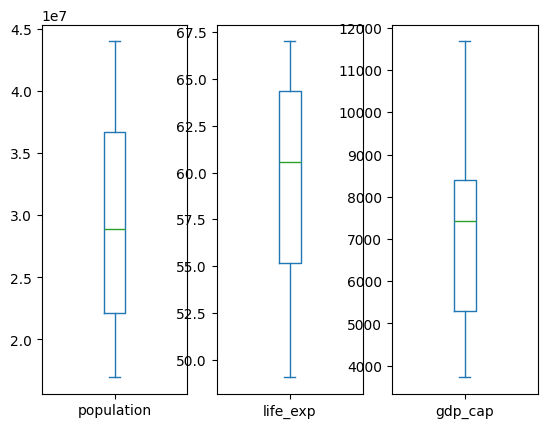

In [8]:
# grafico de cajas (boxplots) de las columnas resultado de la agrupación por años
(df.groupby('year')
   .mean(numeric_only=True)
   .plot(subplots=True,kind='box')
)

<Axes: ylabel='Density'>

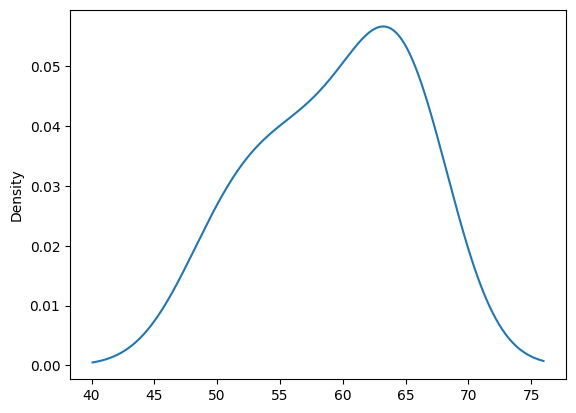

In [9]:
# grafico de distribución de las columnas resultado de la agrupación por años, solo para life_exp
(df.groupby('year')
   .mean(numeric_only=True)['life_exp']
   .plot(kind='density')
)

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

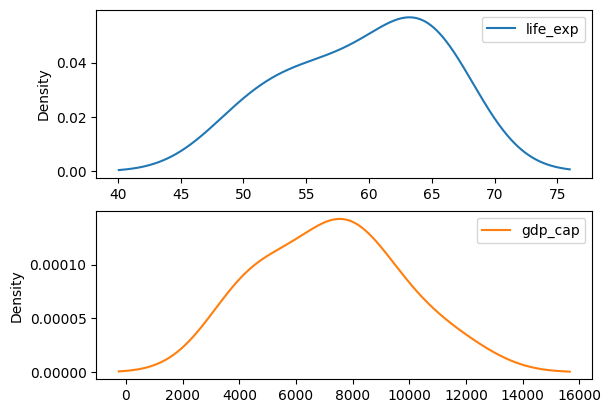

In [10]:
# grafico de distribución de las columnas resultado de la agrupación por años, para life_exp y gdp_cap
(df.groupby('year')
   .mean(numeric_only=True)[['life_exp','gdp_cap']]
   .plot(subplots=True,
         kind='density',
         sharex=False)
)

<Axes: xlabel='continent'>

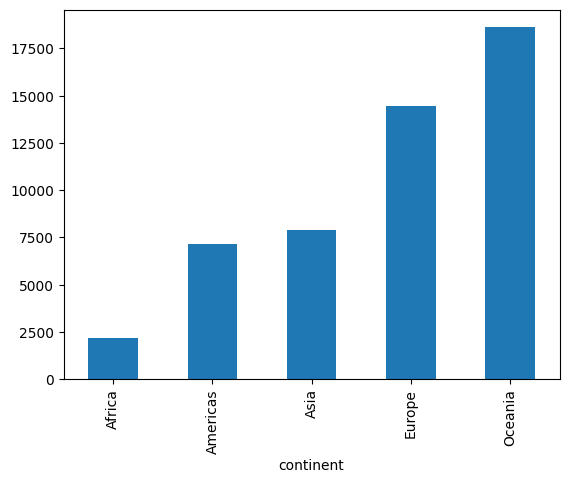

In [11]:
# grafico de barras
(df.groupby('continent')
   .mean(numeric_only=True)['gdp_cap']
   .plot(kind='bar')
)

<Axes: title={'center': 'Valor Medio GDP per cap'}, xlabel='year'>

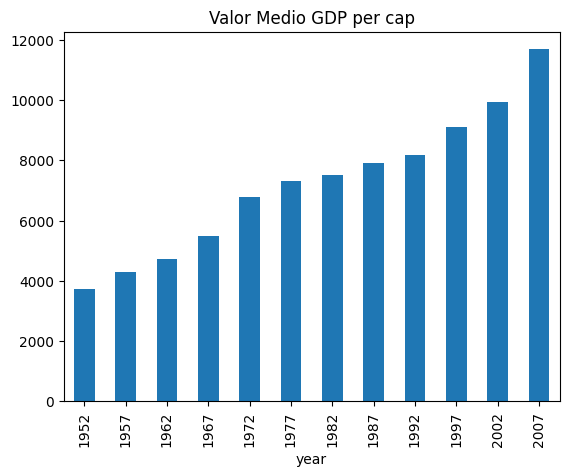

In [12]:
# otro gráfico de barras con título
(df.groupby('year')['gdp_cap']
   .mean(numeric_only=True)
   .plot(kind='bar',
         title='Valor Medio GDP per cap')
)

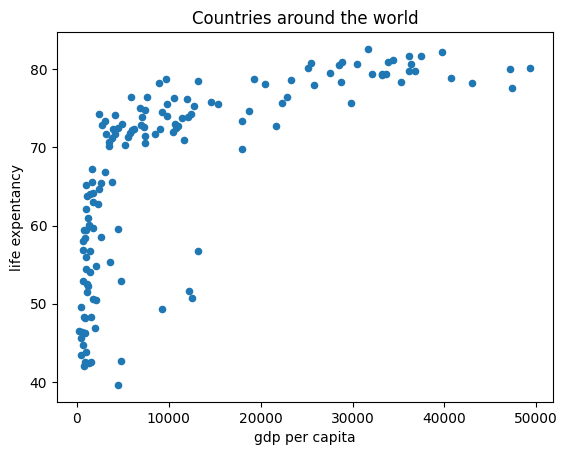

In [13]:
#scatter plot de dos columnas
(df[df['year'] == 2007]
  .plot(x='gdp_cap',
        y='life_exp',
        kind='scatter'
        )
)
plt.xlabel('gdp per capita')
plt.ylabel('life expentancy')
plt.title('Countries around the world')
#plt.savefig('pandas-scatter.png') #guardar al mismo nivel del notebook
plt.savefig('.\outputs\pandas-scatter.png') #guardar al mismo nivel del notebook

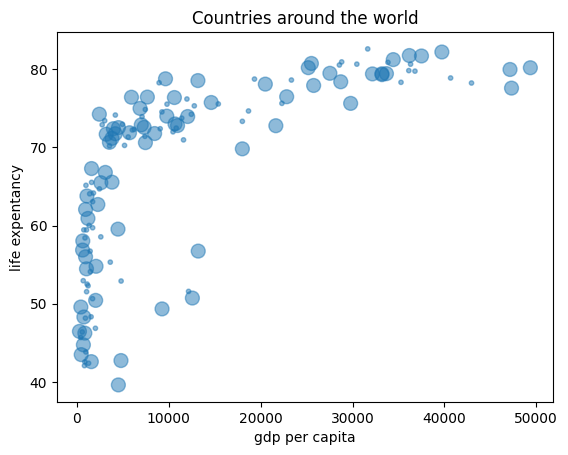

In [14]:
# scatter plot con más opciones 
(df[df['year']==2007]
 .plot(x='gdp_cap',
       y='life_exp',
       kind='scatter',
       s='population',
       sizes=(10,100),
       alpha=0.5
       )
)
plt.xlabel('gdp per capita')
plt.ylabel('life expentancy')
plt.title('Countries around the world')
plt.show()

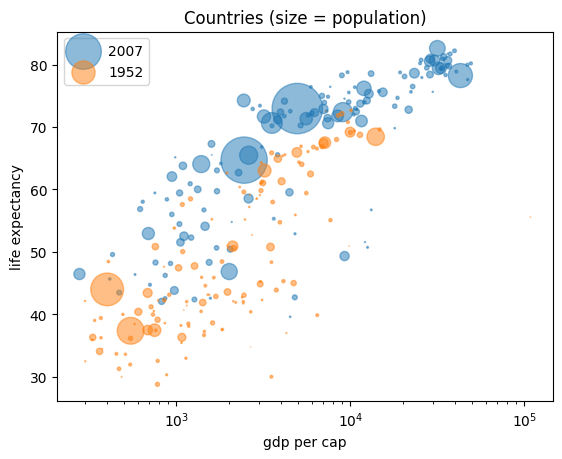

In [15]:
# con dos series
# primera serie con scatter plot año 2007
plt.scatter(df[df['year']==2007]['gdp_cap'],
            df[df['year']==2007]['life_exp'],
            s=df[df['year']==2007]['population']/1e6,
            alpha=0.5)
# segunda serie con scatter plot año 1952
plt.scatter(df[df['year']==1952]['gdp_cap'],
            df[df['year']==1952]['life_exp'],
            s=df[df['year']==1952]['population']/1e6,
            alpha=0.5)
# Editar la gráfica
plt.legend(["2007", "1952"])
plt.xlabel('gdp per cap')
plt.ylabel('life expectancy')
plt.xscale('log')
plt.title('Countries (size = population)')
plt.savefig('.\outputs\pandas-scatter-final.png',dpi=500) #guardar con resolucion de grafica
plt.show()

In [16]:
# librería seaborn
import seaborn as sns

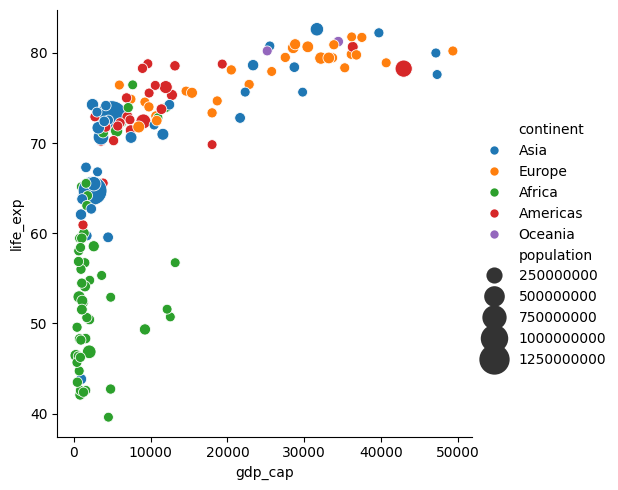

In [17]:
# scatter plot con seaborn
sns.relplot(x="gdp_cap",
            y="life_exp",
            hue='continent',
            size="population",
            sizes=(50,500),
            data=df[df['year'] == 2007]
            )
# hue: separar los datos en N categorías, ejemplo por continente
# size: tamaño de la población
plt.savefig('.\outputs\pandas-seaborn-scatter.png')

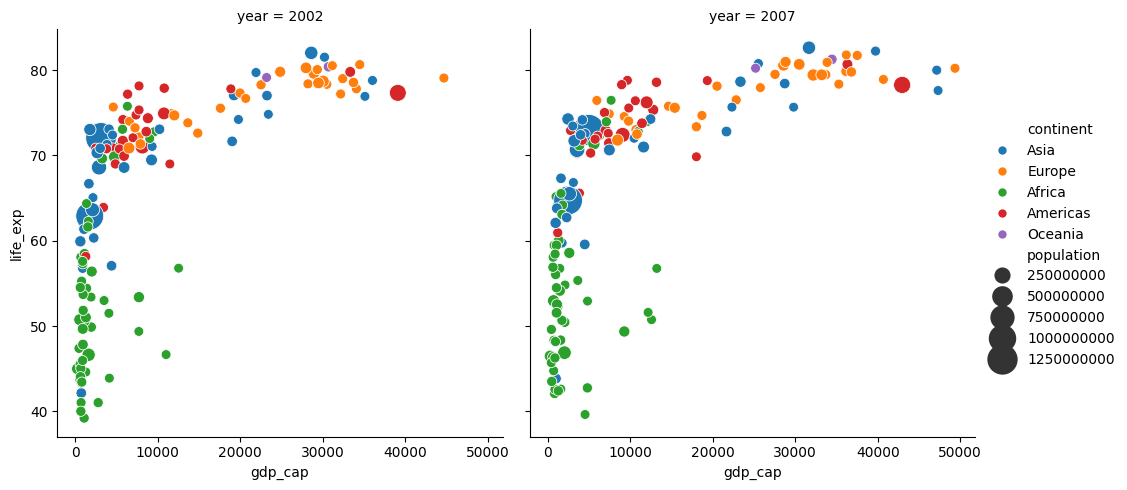

In [18]:
# scatter plot con seaborn
sns.relplot(x="gdp_cap",
            y="life_exp",
            hue='continent',
            size="population",
            sizes=(50,500),
            col='year',
            data=df[df['year'] > 2000]
            )
# hue: separar los datos en N categorías, ejemplo por continente
# size: tamaño de la población
plt.savefig('.\outputs\pandas-seaborn-scatter-2.png')

<Axes: xlabel='gdp_cap', ylabel='continent'>

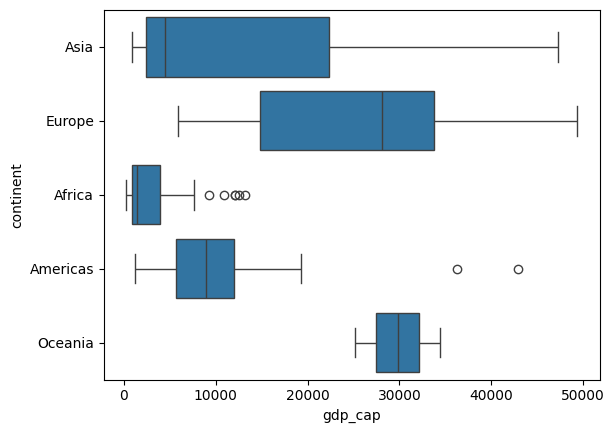

In [19]:
# boxplot seaborn
sns.boxplot(x="gdp_cap",
            y="continent",
            data=df[df['year'] == 2007]
            )

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,1252.572466,1385.236062,1598.078825,2050.363801,2339.615674,2585.938508,2481.592960,2282.668991,2281.810333,2378.759555,2599.385159,3089.032605
Americas,4079.062552,4616.043733,4901.541870,5668.253496,6491.334139,7352.007126,7506.737088,7793.400261,8044.934406,8889.300863,9287.677107,11003.031625
Asia,5195.484004,5787.732940,5729.369625,5971.173374,8187.468699,7791.314020,7434.135157,7608.226508,8639.690248,9834.093295,10174.090397,12473.026870
Europe,5661.057435,6963.012816,8365.486814,10143.823757,12479.575246,14283.979110,15617.896551,17214.310727,17061.568084,19076.781802,21711.732422,25054.481636
Oceania,10298.085650,11598.522455,12696.452430,14495.021790,16417.333380,17283.957605,18554.709840,20448.040160,20894.045885,24024.175170,26938.778040,29810.188275


Text(0.5, 1.0, 'GDP per capita')

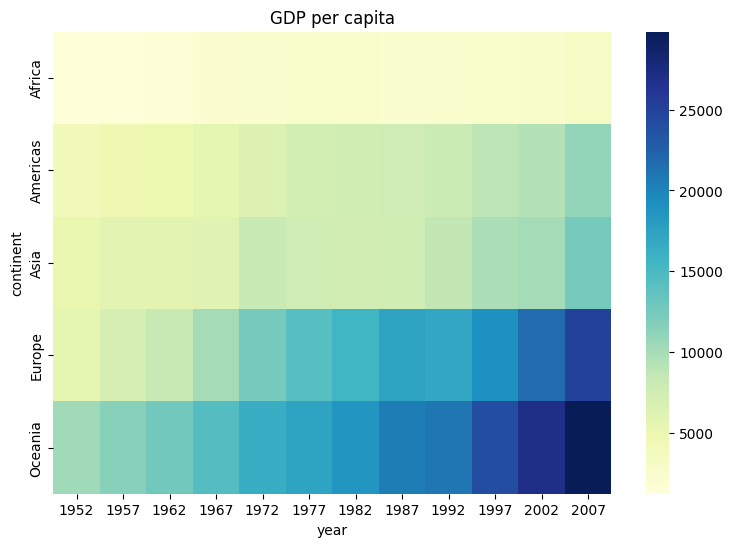

In [20]:
# seaborn heatmap
pt = df.pivot_table(values='gdp_cap',
                    index='continent',
                    columns='year',
                    aggfunc='mean'
                    )
display(pt)
f, ax = plt.subplots(figsize=(9, 6)) #tamaño de la gráfica
sns.heatmap(pt,
            ax=ax,
            cmap="YlGnBu"
            )
# agregar título
ax.set_title('GDP per capita')

In [33]:
import plotly.express as px
# scatter plot con plotly
fig = px.scatter(df[df['year'] == 2007],
                 x='gdp_cap',
                 y='life_exp',
                 size='population',
                 color='continent',
                 hover_name='country',
                 size_max=30,
                 opacity=0.5
                 )

fig.update_layout(legend_title_text='Continent')
fig.update_xaxes(type='log')
fig.update_layout(title='Countries (size = population)', xaxis_title='gdp per cap', yaxis_title='life expectancy')
fig.show()
# exportar a html
fig.write_html(".\outputs\pandas-plotly-scatter.html")